# Implementing logistic regression

In this assignment you will learn to implement logistic regression and apply it on a toy dataset. Logistic regression is a popular machine learning technique used for binary classification. In a binary classification problem, each input belongs to one of two classes, say 0 or 1, and the goal is to predict the correct class of each input. 

While logistic regression is a standard machine learning algorithm used for binary classification, it can also be thought of as a minimalistic neural network. Hence, we chose logistic regression for this exercise since it will help you understand some of the basic principles of machine learning and neural networks.

#### Instructions
-  Do not use any additional libraries other than what is already specified below
-  Do not use loops in your code
-  Do not edit "Expected output" markdown cells
-  Use https://ai.mulearn.org/ for asking any questions you may have about this assignment


### 1. Import Libraries
For this assignment we will import the following libraries:

In [ ]:
#Checking out the repository to make it work with colab
!git clone https://github.com/<your-github-username>/ai-ml-assignments.git

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('ai-ml-assignments')
from utils import utils



### 2. Sigmoid
Let us start this assignment by implementing the sigmoid function: sigmoid(s) = $\frac{1}{1+e^{-z}}$

In [2]:
def sigmoid(z):
    
    # Implement the sigmoid function
    
    # Arguments:
    #    z: A set of values whose sigmoid needs to be computed and stored in the variable s
    #
    # Return value: 
    #    s: sigmoid of values in z 
    
    # Implement the sigmoid function: s = 1/(1+e^(-z))
    
    s = 
    return s

#### Testing
Let us test if the sigmoid function is implemented correctly

Check that for input values 10,  -5,   0,   5,  and 10 you get the expected output as given in the table below


In [3]:
z = np.arange(-10,11,5)
sig = sigmoid(z)
print "Input: ",z
print "Expected output: ",sig

Input:  [-10  -5   0   5  10]
Expected output:  [4.53978687e-05 6.69285092e-03 5.00000000e-01 9.93307149e-01
 9.99954602e-01]


<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th>Input</th>      <th>Expected output</th>    </tr>  </thead>  <tbody>    <tr>      <td>-10.0</td>      <td>0.000045</td>    </tr>    <tr>      <td>-5.0</td>      <td>0.006693</td>    </tr>    <tr>      <td>0.0</td>      <td>0.500000</td>    </tr>    <tr>      <td>5.0</td>      <td>0.993307</td>    </tr>    <tr>      <td>10.0</td>      <td>0.999955</td>    </tr>  </tbody></table> 

**Let us also visualize the sigmoid function**

<img src="sigmoid.jpg" align="left" alt="Expected plot of sigmoid function" title="Expected plot of sigmoid function" />
<p style="clear:left">
The sigmoid function you plot should look like the above figure.
Run the cell below to visualize the sigmoid function you have implemented.
</p>

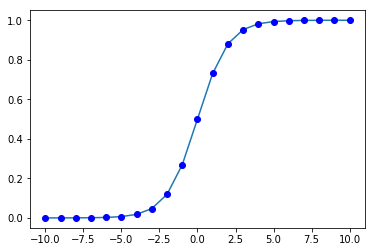

In [4]:
z = np.arange(-10., 11., 1)
sig = sigmoid(z)
plt.plot(z,sig)
plt.plot(z,sig,'bo')
plt.show()

### 3. Data Representation and Parameters
Assuming there are $m$ training samples, the pair $(x^{(i)}, \hat{y}^{(i)})$ denote the $i^{th}$ training sample. Each training sample consists of $n$ features denoted by $x^{(i)}$ and the correponding class label $\hat{y}^{(i)}$. For each training sample, the features $x^{(i)}$ can be thought of as an $n\times1$ column vector. When we use $n$ features for representing an input, the number of parameters in logistic regression becomes $n+1$ where the first $n$ parameters are the weights $w$ and the last parameter is the bias term $b$. The optimal values for these parameters are determined during the training phase which consists of forward propagation and back propagation.

For vectorized operations, we arrange the column vectors corresponding to all the features of the training samples in the form of a $n \times m$ matrix $X$, the ground truth class labels as a $1 \times m$ row vector $\hat{y}$, and the weight parameters $w$ as a $n \times 1$ column vector. Here is an example of three training samples each containing two features with class labels 0, 1, 0 respectively.
$
\begin{align*}
    x^{(1)} &= \begin{bmatrix}
           1 \\
           2 \\
         \end{bmatrix};
         &
    x^{(2)} &= \begin{bmatrix}
           3 \\
           4 \\
         \end{bmatrix};
         &
     x^{(3)} &= \begin{bmatrix}
       5 \\
       6 \\
     \end{bmatrix}.
     &
     \textrm{Then,}\;
     X &= \begin{bmatrix}
           1\;3\;5 \\
           2\;4\;6\\
         \end{bmatrix},
     &
     \hat y &= \begin{bmatrix}
           0\;1\;0
         \end{bmatrix}.
\end{align*}
$

The parameters to be estimated are the weights
$
\begin{align*}
     w &= \begin{bmatrix}
           w_1\\
           w_2\\
         \end{bmatrix}, 
\end{align*}
$
and the bias $b$.


 
Use the cell below to create the parameters $w$ and $b$ and initialize them with zeros.


In [5]:
def create_params(n):
    # Create the parameters w and b and initialise them with zeros
    
    # Arguments:
    #    n: number of weights
    #
    # Return values:
    #    w: the weights created  
    #    b: bias term
    
    # Create a numpy array w of shape (n,1) which are initialized to zeros 
    w = 
    # Initialise bias term b to zero
    b = 
    
    return w,b

#### Testing 
Let us verify if create_params is creating the parameters correctly.

In [6]:
w,b = create_params(2)

print w
print b

[[0.]
 [0.]]
0.0


<table border="1" class="dataframe"> <thead>    <tr style="text-align: right;">      <th>Expected output</th>    </tr>  </thead><tbody> <tr style="text-align: right;"><td>  [ [0. ] <br/>&nbsp; [0. ] ] <br/> 0.0   </td></tr>  </tbody></table>

### 4. Forward Propagation
  
To train our simple neural network i.e., to estimate the parameters, we need to do forward and backward propagation. During forward propagation, you determine using a loss function how good the current value of the parameters are. The loss function for logistic regression (our simple neural network) using $m$ training samples is:

$L = -\frac{1}{m}\sum_{i=1}^{m}\hat y^{(i)}\log(a^{(i)})+(1-\hat y^{(i)})\log(1-a^{(i)})$

where $a^{(i)} = sigmoid( \sum_{j=1}^{n} w_jx^{(i)}_j + b) $ is the activation for the i-th training sample.

You have to implement the forward propagation and return the value of the activation and loss using vectorized implementations (no loops).

In [7]:
def forward_propagate(X,yhat,w,b):
    # Implement forward propagation
    
    # Arguments:
    #    X    : n features of m training samples represented as an nxm matrix
    #    yhat : the groundtruth values for the m training samples represented as an 1xm matrix
    #    w    : the n weight parameters
    #    b    : the bias term b
    #
    # Return values:
    #    a    : the activation of all the training samples calculated according to the formula above
    #    loss : the loss calculated according to the formula above
    
    
    # Calculate the activation using sigmoid function based on the formula above. You need to store 
    # the activation for all the training elements in an appropriate matrix.
    a = 
    
    # Calculate the loss using the equation for L above
    loss = 
    
    return a,loss

#### Testing 
To test forward and backward propagation, let us use the values below for $w, b, X,$ and $\hat y$. Check that the activation and loss returned by the forward_propagate function matches the expected values.

In [8]:
w = np.array([[0], [1]])
b = 2
X = np.array([[1, 3, 5],[2, 4, 6]]) 
yhat = np.array([[1, 0, 1]])
a,loss = forward_propagate(X,yhat,w,b)
print a
print loss

[[0.98201379 0.99752738 0.99966465]]
2.006987006476161


<table border="1" class="dataframe"> <thead>    <tr style="text-align: right;">      <th>Expected output</th>    </tr>  </thead><tbody> <tr style="text-align: right;"><td>  [[0.98201379 0.99752738 0.99966465]] <br/>2.006987006476161</td></tr>  </tbody></table>

### 5. Backward Propagation

Now let us implement the backward propagation where you compute the derivatives of the loss function with respect to the parameters $w$ and $b$. The derivatives are given by:

\begin{align}
\frac{\partial L}{\partial w_j} &= \frac{1}{m} \sum_{i=1}^{m} x^{(i)}_j \cdot (a^{(i)}-\hat y^{(i)})\\
\frac{\partial L}{\partial b} &= \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})
\end{align}
You should write a vectorized implementation without using any loops.

In [9]:
def backward_propagate(X,yhat,a):
    # Implement backward propagation using the equations above without using any loops
    
    # Arguments:
    #    X    : n features of m training samples represented as an nxm matrix
    #    yhat : the groundtruth values for the m training samples represented as an 1xm matrix
    #    a    : the activation of the training samples
    #
    # Return values:
    #    dw   : derivative of loss with respect to w
    #    db   : derivative of loss with respect to b
    
    # Determine the number of trainining samples m from the shape of X
    m = 
    # Calculate dw = dL/dw using the equation above without using any loops
    dw = 
    # Calculate db = dL/db using the equation above without using any loops
    db = 
    
    #return derivative of loss with respect to w and b, i.e., dw and db
    return dw,db

#### Testing 
Check that the results match the expected output.

In [10]:
w = np.array([[0], [1]])
b = 2
X = np.array([[1, 3, 5],[2, 4, 6]]) 
yhat = np.array([[1, 0, 1]])
dw,db = backward_propagate(X,yhat,a)
print dw
print db

[[0.99097306]
 [1.317375  ]]
0.3264019389169358


<table border="1" class="dataframe"> <thead>    <tr style="text-align: left;">      <th>Expected output</th>    </tr>  </thead><tbody> <tr style="text-align: left;"><td>  [[0.99097306]<br/>[1.317375  ]]<br/>0.3264019389169358</td></tr>  </tbody></table>

### 6. Finding the optimal value for the parameters

Using the forward and backward propagation that was implemented above, let us now write the function that will do gradient descent and determine the optimal value of the parameters that minimizes the loss. The gradient descent rule is:
$ \theta = \theta - \alpha \cdot \frac{\partial L}{\partial \theta} $
where $\theta$ is a parameter that needs to be updated, $\frac{\partial L}{\partial \theta}$ is the gradient of  loss function $L$ with respect to $\theta$ and $\alpha$ is the learning rate.

Let us call this function fit. It takes as arguments the input $X$, the groundtruth labels $\hat y$, the number of iterations to run, and the learning rate. 

In [11]:
def fit(X,yhat,numiter=5000,lr=0.05,display_loss = False):
    # Implement the fit fuction that determines optimal values for the parameters w and b using gradient descent.
    
    # Arguments:
    #    X            : n features of m training samples represented as an nxm matrix
    #    yhat         : the groundtruth values for the m training samples represented as an 1xm matrix
    #    numiter      : number of iterations for running the gradient descent 
    #    lr           : learning rate for the gradient descent
    #    display_loss : whether to display loss
    #
    # Return values:
    #    w            : weights determined by the gradient descent
    #    b            : bias determined by the gradient descent
    
    # Determine the number of features from the shape of X
    n = 
    
    # Create the weights and bias
    w,b = create_params(n)
    
    # Iterate for numiter steps
    for i in range(numiter):
        
        # Calculate activation and loss using forward propagation
        a,loss = 
        
        # Calculate dw and db using backward propagation
        dw,db = 
        
        # Calculate the updated parameters by moving a small step (lr) in the opposite direction of the gradient
        w = w - 
        b = b - 
        
        if display_loss and i % 100 == 0:
            print loss
            
    # Return the parameters w and b
    return w,b

#### Testing 
Check that the results match the expected output.

In [14]:
w,b = fit(X,yhat,500,0.005,True)
print w
print b

0.6931471805599453
0.6450579810362779
0.6445228298368414
0.6440564031501352
0.6436175793664201
[[0.02845113]
 [0.10866157]]
0.08021044325121013


<table border="1" class="dataframe"> <thead>    <tr style="text-align: left;">      <th>Expected output</th>    </tr>  </thead><tbody> <tr style="text-align: left;"><td>  

0.6931471805599453<br/>
0.6450579810362779<br/>
0.6445228298368414<br/>
0.6440564031501352<br/>
0.6436175793664201<br/>
    [[0.02845113]<br/>
 [0.10866157]] <br/>
    0.08021044325121013
    </td></tr>  </tbody></table>

### 7. Inference using the learned parameters
Finally, let us write a function that will make predictions for a new input.

In [16]:
def predict(X,w,b):
    # Implement the function to predict the output for a new input using the learned parameters.
    
    # Arguments:
    #    X    : n features of m training samples represented as an nxm matrix
    #    w    : weights determined by the training
    #    b    : bias determined by the training
    #
    # Return values:
    #    pred : prediction for each test sample
    
    
    # Determine the activation for each input test sample
    act = 
    
    # Since we are using a binary classifer, the output has to be either a 0 or a 1, so you need
    # to convert the activation to a 0 or a 1.
    pred = 
    
    return pred

#### Testing 
Check that the results match the expected output.

In [17]:
w = np.array([[0], [1]])
b = 2
X = np.array([[1, 3, 5],[2, 4, 6]])
pred = predict(X,w,b)
print pred

[[1. 1. 1.]]


<table border="1" class="dataframe"> <thead>    <tr style="text-align: left;">      <th>Expected output</th>    </tr>  </thead>
    <tbody>
        <tr style="text-align: left;">
            <td>
                [[1. 1. 1.]]<br/>
            </td>
        </tr>
    </tbody>
</table>

### 8. Putting it all together

Now let us put it all together to classify a simple dataset. Let us first create a simple dataset, split it into training and testing sets and visualise it. For this, we will use the code from http://cs231n.github.io/neural-networks-case-study/

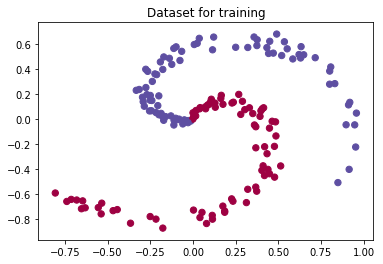

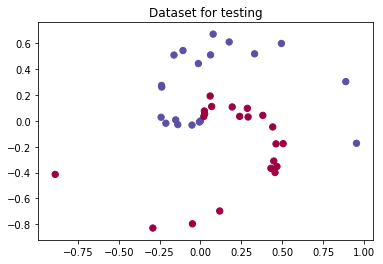

In [18]:

X_train,yhat_train,X_test,yhat_test = utils.create_simple_dataset()

Using the training set, let us estimate the parameters and use it for prediction.

In [19]:

w,b = fit(X_train,yhat_train,5000,0.05)

res = predict(X_test,w,b)

print "Accuracy of prediction: " + str(np.sum(res == yhat_test)/float(res.shape[1]))

Accuracy of prediction: 0.675


Let us now visualize the classifier

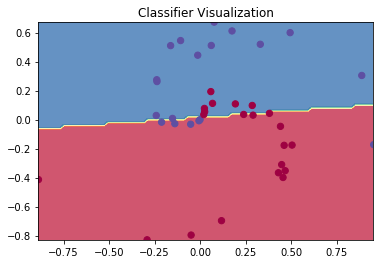

In [20]:
utils.vis_classifier(X_test,yhat_test,w,b,predict)

### 9. Some questions for discussion
You can ask any question you may have about this assignment in the discussion forum https://ai.mulearn.org/. Here are a couple of questions to get you started:

1. https://ai.mulearn.org/t/what-is-the-intuitive-meaning-of-sigmoid-function-and-linear-decision-boundary-in-logistic-regression/70

1. https://ai.mulearn.org/t/why-should-minimizing-the-loss-function-of-logistic-regression-result-in-high-accuracy-predictions/71

    